# Low Volatility

```
https://www.robeco.com/en/insights/2019/01/data-sets-volatility-sorted-portfolios.html
```

In [146]:
import pandas as pd

url = 'http://www.robeco.com/docm/docu-robeco-data-sets-volatility-sorted-portfolios.xlsx'
data = pd.read_excel(url, sheet_name = 'Conservative Formula 2021', skiprows = 2)
cut_row = data[data.isnull().all(axis=1) == True].index.tolist()[0]
data = data.iloc[0:cut_row, 0:11].set_index(data.columns.tolist()[0])
data = data.apply(pd.to_numeric)
data.index.name = None

In [147]:
data.head()

,Low volatility,2,3,4,5,6,7,8,9,High volatility
1929-01-31,0.049068,0.055891,0.028393,0.027992,0.028601,0.042569,0.019569,0.026325,0.068246,-0.015916
1929-02-28,0.001052,-0.004374,0.001483,0.010956,0.026740,-0.017976,0.020075,-0.012382,0.013717,0.057899
1929-03-29,-0.009444,-0.010437,-0.018429,-0.030655,-0.026962,-0.039162,-0.033466,-0.052638,-0.011746,-0.020680
1929-04-30,-0.001644,0.018043,0.010668,0.016756,-0.003668,0.045984,0.019777,-0.003291,0.029879,-0.021943
1929-05-31,0.003102,-0.058104,-0.052835,-0.050367,-0.096969,-0.066940,-0.109504,-0.170854,-0.142702,-0.144243


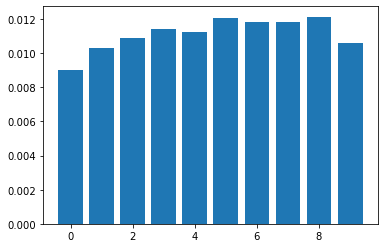

In [148]:
import matplotlib.pyplot as plt
import numpy as np

plt.bar(x = np.arange(10), height = data.mean())
plt.show()

<AxesSubplot:title={'center':'Volatility'}>

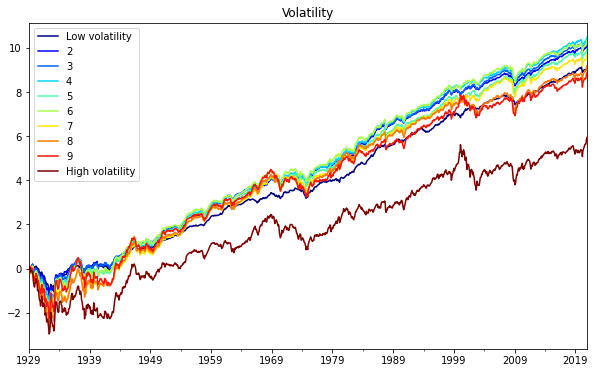

In [205]:
from matplotlib import cm

data_cum = np.log(1+data).cumsum()
data_cum.plot(figsize = (10, 6), colormap=cm.jet, title = 'Volatility')
plt.show()

# datareader 에서 프렌치 리스트

In [1]:
import pandas_datareader.data as web  # module for reading datasets directly from the web
from pandas_datareader.famafrench import get_available_datasets

datasets = get_available_datasets()
datasets

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div',
 'Portfolios_Formed_on_BE-ME_Daily',
 'Portfolios_Formed_on_OP',
 'Portfolios_Formed_on_OP_Wout_Div',
 'Portfolios_Formed_on_OP_Daily',
 'Portfolios_Formed_on_INV',
 'Portfolios_Formed_on_INV_Wout_Div',
 'Portfolios_Formed_on_INV_Daily',
 '6_Portfolios_2x3',
 '6_Portfolios_2x3_Wout_Div',
 '6_Portfolios_2x3_weekly',
 '6_Portfolios_2x3_daily',
 '25_Portfolios_5x5',
 '25_Portfolios_5x5_Wout_Div',
 '25_Portfolios_5x5_Daily',
 '100_Portfolios_10x10',
 '100_Portfolios_10x10_Wout_Div',
 '100_Portfolios_10x10_Daily',
 '6_Portfolios_ME_OP_2x3',
 '6_Portfolios_ME_OP_2x3_Wout_Div',
 '6_Portfolios_ME_OP_2x3_daily',
 '25_Portfolios_ME_OP_5x5',
 '25_Portf

# Short Term Reversal

In [179]:
import pandas_datareader.data as web
df_short = web.DataReader('10_Portfolios_Prior_1_0', 'famafrench', start = '1900-01-01')[0]
df_short.head()

,Lo PRIOR,PRIOR 2,PRIOR 3,PRIOR 4,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR
Date,,,,,,,,,,
1926-02,-7.81,-5.00,-3.97,-3.74,-4.75,-1.32,-1.79,-1.51,-2.60,-5.29
1926-03,-17.24,-12.06,-12.10,-5.31,-8.53,-4.50,-4.73,-4.91,-3.29,-9.56
1926-04,1.28,1.90,2.13,5.14,4.05,3.64,4.57,3.42,4.24,3.39
1926-05,-3.28,0.90,-1.56,1.06,1.98,2.62,1.45,0.39,1.38,1.22
1926-06,7.43,8.25,11.65,5.72,7.86,4.71,4.00,4.06,3.55,3.10


<AxesSubplot:title={'center':'Short Term Return'}, xlabel='Date'>

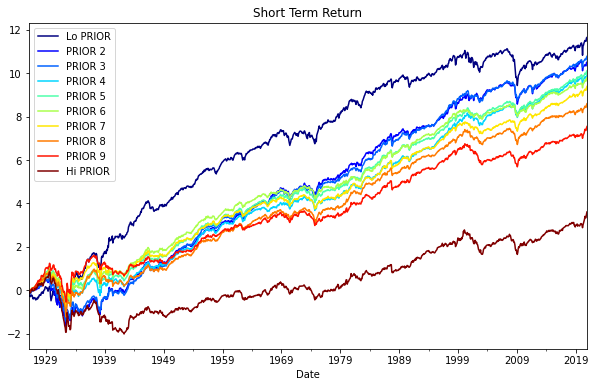

In [206]:
from matplotlib import cm

df_short_cum = np.log(1+df_short/100).cumsum()
df_short_cum.plot(figsize = (10, 6), colormap=cm.jet, title = 'Short Term Return')

# Momentum

<AxesSubplot:title={'center':'12 Month Return'}, xlabel='Date'>

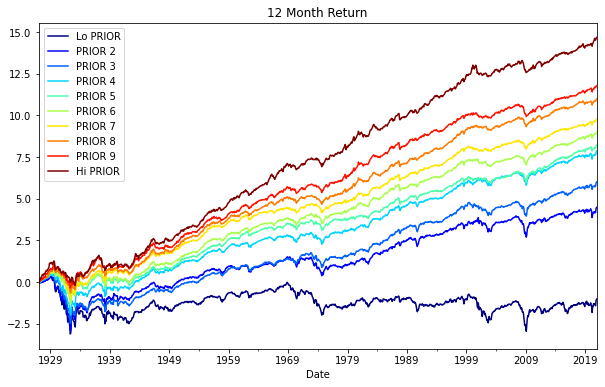

In [207]:
import pandas_datareader.data as web
from matplotlib import cm

df_mom = web.DataReader('10_Portfolios_Prior_12_2', 'famafrench', start = '1900-01-01')[0]
df_mom_cum = np.log(1+df_mom/100).cumsum()
df_mom_cum.plot(figsize = (10, 6), colormap=cm.jet, title = '12 Month Return')

# Long Term Reversal

<AxesSubplot:title={'center':'Long Term Return'}, xlabel='Date'>

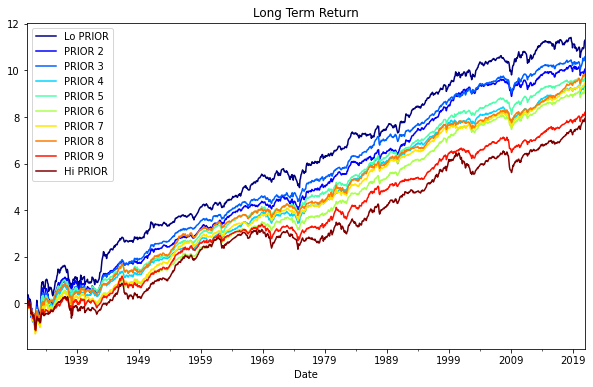

In [208]:
import pandas_datareader.data as web
from matplotlib import cm

df_long = web.DataReader('10_Portfolios_Prior_60_13', 'famafrench', start = '1900-01-01')[0]
df_long_cum = np.log(1+df_long/100).cumsum()
df_long_cum.plot(figsize = (10, 6), colormap=cm.jet, title = 'Long Term Return')

# PBR

In [194]:
import pandas_datareader.data as web
from matplotlib import cm

df_pbr = web.DataReader('Portfolios_Formed_on_BE-ME', 'famafrench', start = '1900-01-01')[0]

df_pbr.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
Date,,,,,,,,,,,,,,,,,,,
1926-07,12.07,5.56,1.92,1.06,3.19,5.41,1.77,2.44,0.60,4.63,1.24,11.40,1.68,1.50,2.09,2.73,1.58,0.63,0.52
1926-08,-9.73,2.64,2.64,6.09,1.00,4.01,2.05,4.58,7.10,0.15,2.18,6.40,2.38,1.58,2.63,4.46,4.94,8.31,3.92
1926-09,-15.16,1.29,0.06,-0.71,-1.03,3.05,-0.30,-0.17,-1.46,-0.11,-2.30,6.32,0.73,-0.89,0.38,-0.28,0.17,-2.16,0.44
1926-10,-5.63,-3.59,-2.42,-3.59,-2.88,-2.96,-2.21,-4.18,-4.28,-3.78,-1.63,-5.01,-1.41,-2.31,-2.10,-4.65,-2.80,-5.46,-1.17
1926-11,5.58,3.13,2.92,3.13,4.11,2.57,1.89,3.96,2.48,6.03,1.49,1.11,3.63,1.97,1.80,4.00,3.85,2.77,1.76


<AxesSubplot:title={'center':'PBR'}, xlabel='Date'>

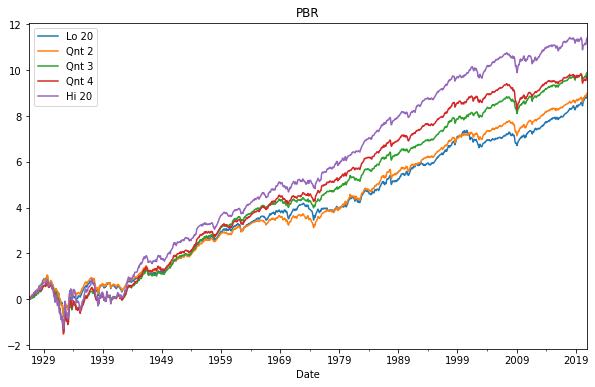

In [204]:
df_pbr = df_pbr.loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_pbr_cum = np.log(1+df_pbr/100).cumsum()
df_pbr_cum.plot(figsize = (10, 6), title = 'PBR')

# PER

<AxesSubplot:title={'center':'PER'}, xlabel='Date'>

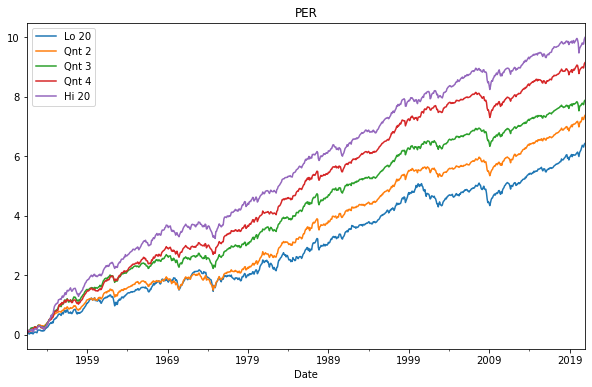

In [203]:
import pandas_datareader.data as web
from matplotlib import cm

df_per = web.DataReader('Portfolios_Formed_on_E-P', 'famafrench', start = '1900-01-01')[0]
df_per = df_per.loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_per_cum = np.log(1+df_per/100).cumsum()
df_per_cum.plot(figsize = (10, 6), title = 'PER')

# PCR

<AxesSubplot:title={'center':'PCR'}, xlabel='Date'>

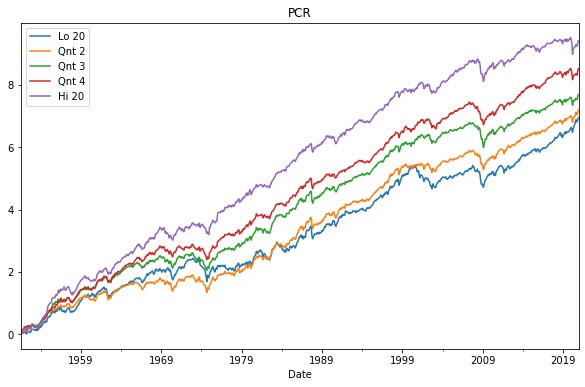

In [209]:
import pandas_datareader.data as web
from matplotlib import cm

df_pcr = web.DataReader('Portfolios_Formed_on_CF-P', 'famafrench', start = '1900-01-01')[0]
df_pcr = df_pcr.loc[:, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']]
df_pcr_cum = np.log(1+df_pcr/100).cumsum()
df_pcr_cum.plot(figsize = (10, 6), title = 'PCR')

In [1]:
import pandas_datareader.data as web
from matplotlib import cm

df_op = web.DataReader('Portfolios_Formed_on_OP', 'famafrench', start = '1900-01-01')[0]


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x92 in position 901: invalid start byte

# Operating Profit

In [17]:
import requests as rq
from zipfile import ZipFile

url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/Portfolios_Formed_on_OP_CSV.zip'

raw = rq.get(url)
zip_file = ZipFile(BytesIO(raw.content))

df_op = pd.read_csv(zip_file.namelist()[0], skiprows = 24, index_col = 0)

cut_row = df_op[df_op.isnull().all(axis=1) == True].index.tolist()[0]

df_op = df_op.loc[:cut_row, ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']].dropna()
df_op = df_op.apply(pd.to_numeric)

FileNotFoundError: [Errno 2] No such file or directory: 'Portfolios_Formed_on_OP.CSV'

<AxesSubplot:title={'center':'Operating Profitability'}>

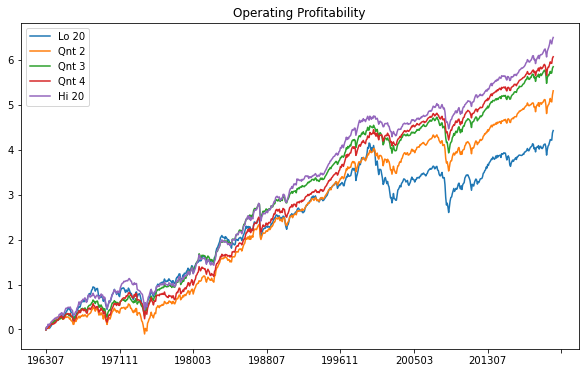

In [180]:
df_op_cum = np.log(1+df_op/100).cumsum()
df_op_cum.plot(figsize = (10, 6), title = 'Operating Profitability')

# PBR & OP

In [18]:
import requests as rq
from zipfile import ZipFile

url = 'https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/25_Portfolios_BEME_OP_5x5_CSV.zip'

raw = rq.get(url)
zip_file = ZipFile(BytesIO(raw.content))


In [21]:
zip_file

<zipfile.ZipFile file=<_io.BytesIO object at 0x00000249CE450400> mode='r'>

In [20]:
pd.read_csv(zip_file.namelist()[0], skiprows = 24, index_col = 0)

FileNotFoundError: [Errno 2] No such file or directory: '25_Portfolios_BEME_OP_5x5.CSV'